In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset
file_path = "/Users/samenergy/Documents/Projects/Formative-1-Databases/loan_data.csv"  # Change this if your file is in a different location
df = pd.read_csv(file_path)

In [5]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
# Define categorical and numerical columns
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership',
                    'loan_intent', 'previous_loan_defaults_on_file']
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                  'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [9]:
# Define target variable
X = df[categorical_cols + numerical_cols]
y = df['loan_status']


In [10]:
# Define the column transformer with one-hot encoding for categorical columns and standard scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

In [11]:
# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# Convert the transformed data back to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())


In [12]:
# Display the transformed datase
X_transformed_df.head()

,cat__person_gender_female,cat__person_gender_male,cat__person_education_Associate,cat__person_education_Bachelor,cat__person_education_Doctorate,cat__person_education_High School,cat__person_education_Master,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__previous_loan_defaults_on_file_No,cat__previous_loan_defaults_on_file_Yes,num__person_age,num__person_income,num__person_emp_exp,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,num__credit_score
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-0.953538,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,-1.419814
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-1.118963,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,-2.549975
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-0.457264,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,0.047412
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.788113,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,0.840507
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-0.622689,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,-0.924130


In [13]:
# Check the distribution of values in the loan_status column
loan_status_counts = df['loan_status'].value_counts()

print(loan_status_counts)


loan_status
0    35000
1    10000
Name: count, dtype: int64


In [14]:

# Split the data into training and testing sets (you can use the train_test_split for better results)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [15]:
# Initialize SMOTE to balance the training dataset
smote = SMOTE(random_state=42)


In [16]:
# Fit SMOTE on the training data and resample it
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


/Users/samenergy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [17]:
# Check the distribution of the resampled data
print(f"Original training set size: {y_train.value_counts()}")
print(f"Resampled training set size: {y_train_resampled.value_counts()}")

Original training set size: loan_status
0    28010
1     7990
Name: count, dtype: int64
Resampled training set size: loan_status
0    28010
1    28010
Name: count, dtype: int64


In [18]:
# Define the TensorFlow model
model = keras.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),  # Input layer matching feature count
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)


Epoch 1/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.8712 - loss: 0.2944 - val_accuracy: 0.8736 - val_loss: 0.2473
Epoch 2/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.9003 - loss: 0.2150 - val_accuracy: 0.8820 - val_loss: 0.2323
Epoch 3/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.9024 - loss: 0.2109 - val_accuracy: 0.8944 - val_loss: 0.2161
Epoch 4/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.9057 - loss: 0.2028 - val_accuracy: 0.8872 - val_loss: 0.2288
Epoch 5/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - accuracy: 0.9079 - loss: 0.2011 - val_accuracy: 0.8910 - val_loss: 0.2197
Epoch 6/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.9109 - loss: 0.1931 - val_accuracy: 0.8880 - val_loss: 0.2328
Epoch 7/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - accuracy: 0.9122 - loss: 0.1909 - val_accuracy: 0.8882 - val_loss: 0.2283
Epoch 8/20
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.9134 -

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8965 - loss: 0.2116
Test Accuracy: 0.8961


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


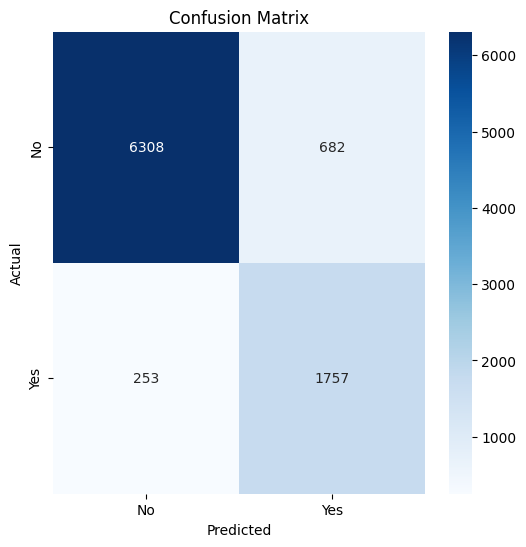

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Predictions for binary classification (0 or 1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

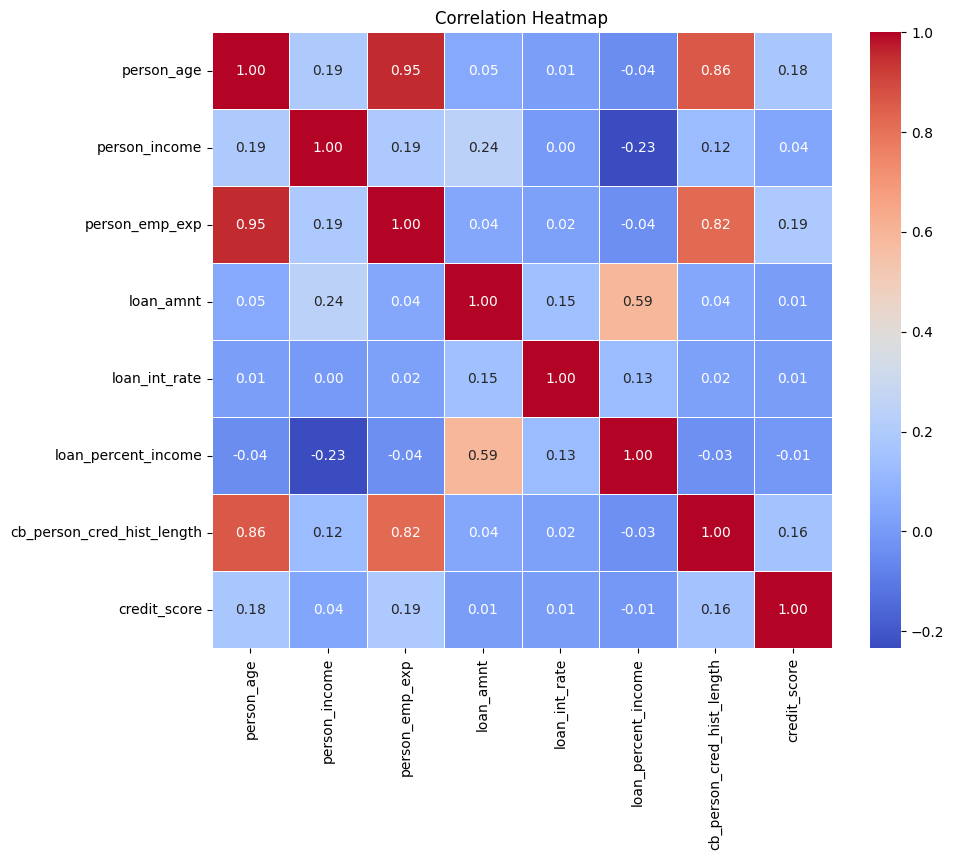

In [23]:
# 2. Correlation Heatmap (For the original features before transformations)
correlation_matrix = df[numerical_cols].corr()  # Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Save the model to a file
model.save('loan_prediction_model.keras')

print("Model saved successfully!")


Model saved successfully!


In [25]:
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the preprocessor again
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Fit the preprocessor on the training data
X_transformed = preprocessor.fit_transform(X)

# Save the preprocessor to a file
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [26]:
import joblib
import pandas as pd
import json
import tensorflow as tf
from tensorflow import keras

# Load the pre-trained model and the fitted preprocessor
model = keras.models.load_model('loan_prediction_model.keras')  # Adjust the path to where your model is saved
preprocessor = joblib.load('preprocessor.pkl')  # Load the saved preprocessor

# Sample JSON input data
json_data = '''{
    "person_age": 21.0,
    "person_gender": "female",
    "person_education": "High School",
    "person_income": 12282.0,
    "person_emp_exp": 0,
    "person_home_ownership": "OWN",
    "loan_amnt": 1000.0,
    "loan_intent": "EDUCATION",
    "loan_int_rate": 11.14,
    "loan_percent_income": 0.08,
    "cb_person_cred_hist_length": 2.0,
    "credit_score": 504,
    "previous_loan_defaults_on_file": "Yes"

  }'''

# Convert JSON to a dictionary
input_data = json.loads(json_data)

# Convert input data to a DataFrame (same structure as during training)
input_df = pd.DataFrame([input_data])

# Apply the same preprocessing steps (one-hot encoding, standard scaling)
X_input = preprocessor.transform(input_df)

# Predict the loan status (0 or 1) using the trained model
prediction = model.predict(X_input)

# Print the prediction result
loan_status_prediction = 'Approved' if prediction[0][0] > 0.5 else 'Denied'
print(f"Loan Status Prediction: {loan_status_prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Loan Status Prediction: Denied
